# Advent of Code 2023 - Dia 6

O problema do [dia 6 do Advent of Code de 2023](https://adventofcode.com/2023/day/6) consiste em uma competição de barcos, onde quanto mais tempo segurar um botão, mais rápido o barco irá, porém menos tempo terá para se deslocar. Considerando que a competição tem tempo limite, deve-se encontrar um equilíbrio entre velocidade e tempo de deslocamento para bater os recordes.

## Estudo do Problema

Como esse problema envolve tempo, distância e velocidade, isso permite modelá-lo matematicamente a partir da [definição de velocidade média](https://pt.wikipedia.org/wiki/Velocidade#Velocidade_m%C3%A9dia), uma vez que essa definição envolve as três grandezas citadas e não há variação da velocidade enquanto o deslocamento ocorre.

Para auxiliar nesse processo, será utilizada a biblioteca [SymPy](https://www.sympy.org/pt/) do [Python](https://www.python.org/). E com ele instalado no ambiente, basta importar suas funções. E para melhorar a visualização dentro de um notebook (arquivo `.ipynb`) é executado a função [`init_printing()`](https://docs.sympy.org/latest/modules/interactive.html#sympy.interactive.printing.init_printing):

In [1]:
from sympy import *

init_printing()

A definição de velocidade pode ser modelada no SymPy definindo os símbolos que serão utilizados e organizando-os em uma equação, onde `v` é a velocidade, `Δs` é a variação do espaço e `Δt` a variação do tempo:

In [2]:
v, ds, dt = symbols('v Δs Δt')
velocidade = Eq(v, ds / dt)
velocidade

    Δs
v = ──
    Δt

Com a definição de velocidade definida, pode-se relacionar essas grandezas com os dados do problema. No caso, a velocidade (`v`) será numericamente igual ao tempo em que o botão ficou pressionado (`x`), e a variação do tempo (`Δt`), que é o tempo do deslocamento, será igual ao tempo limite da corrida (`t`) descontado o tempo que o botão ficou pressionado (`t - x`). Logo pode-se substituí-los na equação:

In [3]:
x, t = symbols('x t')
velocidade_substituida = velocidade.subs({
    v: x,
    dt: t - x,
})
velocidade_substituida

      Δs 
x = ─────
    t - x

Como o problema pede para bater o recorde de distância percorrida, pode-se utilizar o SymPy para isolar a variável da distância (`Δs`) na equação anterior, o que resulta em uma expressão em função do tempo em que o botão foi pressionado (`x`). Utilizando essa expressão em uma inequação de forma que seja maior do que o recorde atual (`r`), valores de `x` que resolvam a inequação também resultam em novos recordes:

In [4]:
r = symbols('r')
distancia_percorrida = solve(velocidade_substituida, ds)[0]
ineq = StrictGreaterThan(distancia_percorrida, r)
ineq

x⋅(t - x) > r

Embora possa não parecer, esse é um polinômio de segundo grau, uma vez que `x` será elevado ao quadrado. A parábola resultante desse polinômio de segundo grau também possui a concavidade virada para baixo, uma vez que a constante que multiplica `x²` é negativa (`-1`):

In [5]:
expand(ineq)

       2    
t⋅x - x  > r

Para facilitar a visualização, pode-se desenhar o gráfico das duas funções da inequação (lados da comparação). A baixo encontra-se o gráfico utilizando os valores do primeiro exemplo do problema:

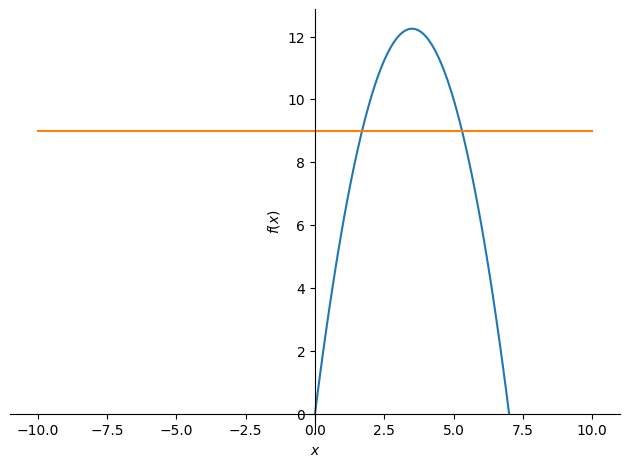

In [6]:
tempo = 7
distancia = 9

p1 = plot(distancia_percorrida.subs({t: tempo}), (x, 0, tempo), show=False)
p2 = plot(distancia, show=False)
p1.append(p2[0])
p1.show()

Considerando a inequação, os valores desejado são os números pertencentes ao [conjunto dos naturais](https://pt.wikipedia.org/wiki/N%C3%BAmero_natural) (inteiros e não negativos) da parábola que estão a cima da linha do recorde atual. Logo é possível gerar um conjunto com os valores de `x` que solucionam o problema:

In [7]:
solucoes = solveset(ineq.subs({t: 7, r: 9}), x, domain=S.Naturals)
solucoes

{2, 3, 4, 5}

Como curiosidade, ainda pode-se encontrar os pontos onde as duas funções se encontram, para isso basta transformar a inequação em uma equação e resolvê-la:

In [8]:
eq = Eq(distancia_percorrida, r)
solucoes = solve(eq.subs({t: 7, r: 9}), x)
solucoes

⎡7   √13  √13   7⎤
⎢─ - ───, ─── + ─⎥
⎣2    2    2    2⎦

Ou ainda obter o seu valor numérico:

In [9]:
[solucao.n() for solucao in solucoes]

[1.69722436226801, 5.30277563773199]

Desta forma é possível encontrar tempos em que o botão pode ser pressionado (`x`) que resultem em novos recordes resolvendo apenas a inequação.

## Parte 1

A primeira parte do problema pede para encontrar a quantidade de soluções possível para algumas corridas e multiplicá-los. Para facilitar esse cálculo, pode-se criar uma função que retorne a quantidade de soluções encontradas para cada corrida, que será igual à quantidade de números no conjunto da solução como calculado anteriormente:

In [10]:
def quantidade_solucoes(tempo, distancia):
    return len(solveset(ineq.subs({t: tempo, r: distancia}), x, domain=S.Naturals))

Os dados de entrada podem ser facilmente tratados com operações de string e conversão de tipos:

In [11]:
dados = """Time:      7  15   30
Distance:  9  40  200"""

str_tempos, str_distancias = [linha.split(':')[1].split() for linha in dados.split('\n')]
int_tempos = [int(tempo) for tempo in str_tempos]
int_distancias = [int(distancia) for distancia in str_distancias]

{
    'str_tempos': str_tempos,
    'int_tempos': int_tempos,
    'str_distancias': str_distancias,
    'int_distancias': int_distancias,
}

{'str_tempos': ['7', '15', '30'],
 'int_tempos': [7, 15, 30],
 'str_distancias': ['9', '40', '200'],
 'int_distancias': [9, 40, 200]}

E as quantidades de soluções possíveis podem ser facilmente calculadas chamando a função criada anteriormente:

In [12]:
quantidades = [quantidade_solucoes(tempo, distancia) for tempo, distancia in zip(int_tempos, int_distancias)]
quantidades

[4, 8, 9]

Com isso feito, basta multiplicar todos os valores:

In [13]:
from functools import reduce
from operator import mul

reduce(mul, quantidades)

288

## Parte 2

A segunda parte do problema é bastante semelhante a primeira, porém envolve números maiores como entrada (todos os valores da primeira parte concatenados). Como aqui todas as operações são cálculos matemáticos, isso não deve ser problema e pode ser facilmente calculado:

In [14]:
tempo = int(''.join(str_tempos))
distancia = int(''.join(str_distancias))

quantidade_solucoes(tempo, distancia)

71503

## Considerações

O SymPy é uma boa ferramenta para manipular expressões matemáticas. Ela ainda exige o conhecimento do que deve ser feito, mas facilita partes trabalhosas, como resolver e simplificar equações, de que outra forma teriam que ser feitas manualmente. Desta forma, ela facilitou grandemente a modelagem e resolução desse problema do Advent of Code, além de permitir uma melhor e rápida visualização do problema usando comandos rápidos.